# PHASE 1: Create a fragment library


In [1]:
"""
PHASE 1: Create a fragment library

Created on Friday, 19 May 2023
Updated on Monday May 22 2023
Updated on Monday June 06 2023
Updated on Monday July 17 2023 - approved C09 from chembl and drugbank

@author: Odifentse M Lehasa

The purpose of this notebook is fragment the pool of original (FDA-approved) C09 molecules. 
The fragments will then be counted and screened to assess whether they meet the Ro3 criteria.

"""

'\nPHASE 1: Create a fragment library\n\nCreated on Friday, 19 May 2023\nUpdated on Monday May 22 2023\nUpdated on Monday June 06 2023\nUpdated on Monday July 17 2023 - approved C09 from chembl and drugbank\n\n@author: Odifentse M Lehasa\n\nThe purpose of this notebook is fragment the pool of original (FDA-approved) C09 molecules. \nThe fragments will then be counted and screened to assess whether they meet the Ro3 criteria.\n\n'

## Step 0: Import all relevant libraries 

In [2]:
# import all relevant libraries 

from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import BRICS
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Lipinski
import pandas as pd 

## Step 1: Import data

In [4]:
# import dataset of unique C09 molecules from CHEMBL in sdf format

chembl = [x for x in Chem.SDMolSupplier('/Users/odilehasa/Hypertension/Final_Experiments/Data/Chembl_C09.sdf') if x is not None]


In [5]:
# import dataset of unique C09 molecules from DRUGBANK in sdf format

drugbank = [x for x in Chem.SDMolSupplier('/Users/odilehasa/Hypertension/Final_Experiments/Data/Drugbank_C09.sdf') if x is not None]


In [11]:
# combine the datasets into one 

hptmols = chembl + drugbank

In [12]:
# check the length of the list (number of molecules in the list)
len(hptmols)

26

### Test: view one molecule from the list


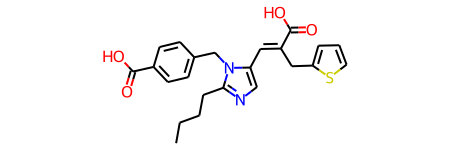

In [14]:
hptmols[5]

## Step 2: Create fragments from molecules

In [15]:
# create a LIST to store all the fragment elements. In this case we need it to be a list not a set.

allfrags=[]

# fragment all the molecules in the list created in step 1.
for m in hptmols:
    fragments = list(BRICS.BRICSDecompose(m))  #saves it as a list
    allfrags.append(fragments)
    
# view list of all the fragments.    
allfrags


[['[14*]c1oc(=O)oc1C',
  '[16*]c1ccc([16*])cc1',
  '[4*]C[8*]',
  '[14*]c1noc(=O)[nH]1',
  '[1*]C([6*])=O',
  '[9*]n1c([14*])nc2cccc([16*])c21',
  '[3*]O[3*]',
  '[16*]c1ccccc1[16*]',
  '[8*]C[8*]',
  '[4*]CC'],
 ['[6*]C(=O)O',
  '[3*]O[3*]',
  '[1*]C(=O)[C@@H]([4*])CC[8*]',
  '[5*]N[5*]',
  '[16*]c1ccccc1',
  '[13*][C@@H]1CCCN2CCC[C@H]([15*])C(=O)N12',
  '[4*]CC'],
 ['[8*]CCC',
  '[14*]c1nnn[nH]1',
  '[14*]c1oc(=O)oc1C',
  '[16*]c1ccc([16*])cc1',
  '[4*]C[8*]',
  '[9*]n1c([14*])nc([14*])c1[14*]',
  '[1*]C([6*])=O',
  '[3*]O[3*]',
  '[16*]c1ccccc1[16*]',
  '[8*]C[8*]',
  '[8*]C(C)(C)O'],
 ['[4*]CC(C)(C)C(N)=O',
  '[3*]OC',
  '[3*]O[3*]',
  '[4*]CCC[4*]',
  '[5*]N[5*]',
  '[16*]c1ccc([16*])c([16*])c1',
  '[1*]C(=O)[C@@H](C[C@H](O)[C@@H](N)C[C@H](C[8*])C(C)C)C(C)C'],
 ['[1*]C(=O)[C@@H]([4*])C',
  '[6*]C(=O)O',
  '[5*]N1[C@H]2CCCC[C@@H]2C[C@H]1[13*]',
  '[3*]O[3*]',
  '[1*]C(=O)[C@@H]([4*])CC[8*]',
  '[5*]N[5*]',
  '[16*]c1ccccc1',
  '[4*]CC'],
 ['[16*]c1ccc([16*])cc1',
  '[6*]C(=O)O',
  

In [17]:
# check the length of the allfrags list (number of fragments)
len(allfrags)

26

### Test: View the fragments of a specific molecule from the list

In [21]:

allfrags[5]

['[16*]c1ccc([16*])cc1',
 '[6*]C(=O)O',
 '[8*]CCCC',
 '[7*]C[8*]',
 '[14*]c1cccs1',
 '[8*]C[8*]',
 '[7*]C(C[8*])C(=O)O',
 '[9*]n1c([14*])cnc1[14*]']

## Step 3: Count fragments

### Create dictionary to count frequency of each fragment


In [24]:
# create dictionary to count frequency of each fragments

frag_freq = {}

for frag in allfrags:
    for i in frag:
        frag_freq[i] = frag_freq[i]+1 if i in frag_freq else 1
        
frag_freq

{'[14*]c1oc(=O)oc1C': 2,
 '[16*]c1ccc([16*])cc1': 9,
 '[4*]C[8*]': 4,
 '[14*]c1noc(=O)[nH]1': 1,
 '[1*]C([6*])=O': 4,
 '[9*]n1c([14*])nc2cccc([16*])c21': 2,
 '[3*]O[3*]': 17,
 '[16*]c1ccccc1[16*]': 8,
 '[8*]C[8*]': 9,
 '[4*]CC': 13,
 '[6*]C(=O)O': 16,
 '[1*]C(=O)[C@@H]([4*])CC[8*]': 9,
 '[5*]N[5*]': 14,
 '[16*]c1ccccc1': 12,
 '[13*][C@@H]1CCCN2CCC[C@H]([15*])C(=O)N12': 1,
 '[8*]CCC': 3,
 '[14*]c1nnn[nH]1': 5,
 '[9*]n1c([14*])nc([14*])c1[14*]': 2,
 '[8*]C(C)(C)O': 2,
 '[4*]CC(C)(C)C(N)=O': 1,
 '[3*]OC': 3,
 '[4*]CCC[4*]': 1,
 '[16*]c1ccc([16*])c([16*])c1': 2,
 '[1*]C(=O)[C@@H](C[C@H](O)[C@@H](N)C[C@H](C[8*])C(C)C)C(C)C': 1,
 '[1*]C(=O)[C@@H]([4*])C': 9,
 '[5*]N1[C@H]2CCCC[C@@H]2C[C@H]1[13*]': 1,
 '[8*]CCCC': 2,
 '[7*]C[8*]': 2,
 '[14*]c1cccs1': 1,
 '[7*]C(C[8*])C(=O)O': 1,
 '[9*]n1c([14*])cnc1[14*]': 1,
 '[10*]N1C(=O)N(C)C[C@H]1[13*]': 1,
 '[5*]N1CCC[C@H]1[13*]': 4,
 '[4*][C@@H](CC[8*])C(=O)O': 2,
 '[1*]C(=O)[C@@H]([4*])CCCCN': 1,
 '[9*]n1c([14*])nc2c(C)cc([16*])cc21': 1,
 '[14*]c1nc2cc

### View total number of fragments

In [26]:
len(frag_freq)

64

### Test: View a fragment from the list


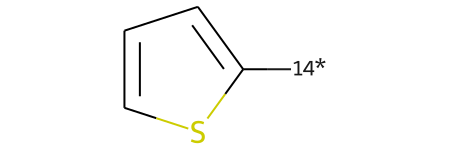

In [14]:
# view a fragment

x =Chem.MolFromSmiles(allfrags[5][0]) #fragment 1 from molecule in position 6.

x

## Step 4: Create a frequency table for the fragments

In [27]:
# create a frequency table

df = pd.DataFrame(list(frag_freq.items()),columns = ['Fragment','Frequency']) 

df.sort_values('Frequency', ascending=False)

,Fragment,Frequency
6,[3*]O[3*],17
10,[6*]C(=O)O,16
12,[5*]N[5*],14
9,[4*]CC,13
13,[16*]c1ccccc1,12
...,...,...
39,[4*][C@H](C(=O)O)C(C)C,1
40,[5*]N([5*])[5*],1
41,[5*]N1Cc2cc([16*])c([16*])cc2C[C@H]1[13*],1
42,[1*]C(=O)[C@@H]([4*])CCC,1


## Step 5: Calculate Rule of Three (Ro3)

In [28]:

# create a list to store properties of each fragment

Ro3 = list()

# calculate the Rule of Three properties (Lipinski) for each new fragment

for x in df['Fragment']:
    
    y = Chem.MolFromSmiles(x)
    Mol_weight = Descriptors.MolWt(y)
    LogP = Descriptors.MolLogP(y)
    Hdonors = Lipinski.NumHDonors(y)
    Hacceptors = Lipinski.NumHAcceptors(y)
    
    new = (x, Mol_weight, LogP, Hdonors, Hacceptors)

    # add all fragment properties into list
    Ro3.append(new)

#view list with all molecules and properties
Ro3

[('[14*]c1oc(=O)oc1C', 99.065, -0.2841799999999999, 0, 3),
 ('[16*]c1ccc([16*])cc1', 76.098, 0.035800000000000054, 0, 0),
 ('[4*]C[8*]', 14.027, 0.4608, 0, 0),
 ('[14*]c1noc(=O)[nH]1', 85.042, -1.4625000000000001, 1, 3),
 ('[1*]C([6*])=O', 28.009999999999998, 0.20500000000000002, 0, 1),
 ('[9*]n1c([14*])nc2cccc([16*])c21',
  115.11499999999997,
  -0.30210000000000015,
  0,
  2),
 ('[3*]O[3*]', 15.999, -0.0684, 0, 1),
 ('[16*]c1ccccc1[16*]', 76.098, 0.03579999999999994, 0, 0),
 ('[8*]C[8*]', 14.027, 0.4608, 0, 0),
 ('[4*]CC', 29.061999999999998, 0.9739, 0, 0),
 ('[6*]C(=O)O', 45.017, 0.2137, 1, 1),
 ('[1*]C(=O)[C@@H]([4*])CC[8*]', 69.08300000000001, 0.7578, 0, 1),
 ('[5*]N[5*]', 15.015, -0.4954, 1, 1),
 ('[16*]c1ccccc1', 77.106, 0.8612, 0, 0),
 ('[13*][C@@H]1CCCN2CCC[C@H]([15*])C(=O)N12', 166.224, 0.8328, 0, 2),
 ('[8*]CCC', 43.089, 1.3639999999999999, 0, 0),
 ('[14*]c1nnn[nH]1', 69.047, -1.6257000000000004, 1, 3),
 ('[9*]n1c([14*])nc([14*])c1[14*]', 64.047, -2.2807000000000004, 0, 2),


## Step 6: Create Fragment Library Dataframe

In [29]:
# save values as dataframe

df_Ro3 = pd.DataFrame(Ro3, columns =['Fragment','Molecular Weight', 'LogP','Hydrogen Donors','Hydrogen Acceptors'])
df_Ro3


,Fragment,Molecular Weight,LogP,Hydrogen Donors,Hydrogen Acceptors
0,[14*]c1oc(=O)oc1C,99.065,-0.28418,0,3
1,[16*]c1ccc([16*])cc1,76.098,0.03580,0,0
2,[4*]C[8*],14.027,0.46080,0,0
3,[14*]c1noc(=O)[nH]1,85.042,-1.46250,1,3
4,[1*]C([6*])=O,28.010,0.20500,0,1
...,...,...,...,...,...
59,[15*][C@H]1[C@H]([15*])C[C@@H]2CN3CCc4c([nH]c5...,276.383,3.29490,1,1
60,[1*]C(=O)C[7*],42.037,0.02990,0,1
61,[16*]c1cc([16*])c([16*])c([16*])c1,74.082,-1.61500,0,0
62,[12*]S(=O)(=O)c1ccccc1[16*],140.163,0.09920,0,2


In [31]:
df_Ro3['Ro3 Pass'] = 0 # add a Druggability column with 0 as default value

# find all rows that fulfills your conditions and set class to 1 if the criteria is met 

df_Ro3.loc[(df_Ro3['Molecular Weight'] <= 300) & # molecular weight 
       (df_Ro3['LogP'] <= 3) & # LogP
       (df_Ro3['Hydrogen Donors'] <= 3) & # Hydrogen donors
       (df_Ro3['Hydrogen Acceptors'] <= 3), # Hydrogen acceptors
       
       'Ro3 Pass'] =1 # then set class to True if criteria is met


### Merge Ro3 dataframe with frequency count dataframe

In [32]:

df_frags= df_Ro3.merge(df[['Frequency','Fragment']], on = 'Fragment', how = 'left')

df_frags_sort= df_frags.sort_values('Frequency', ascending=False) # sort Frequency column in descending order

df_frags_sort

,Fragment,Molecular Weight,LogP,Hydrogen Donors,Hydrogen Acceptors,Ro3 Pass,Frequency
6,[3*]O[3*],15.999,-0.06840,0,1,1,17
10,[6*]C(=O)O,45.017,0.21370,1,1,1,16
12,[5*]N[5*],15.015,-0.49540,1,1,1,14
9,[4*]CC,29.062,0.97390,0,0,1,13
13,[16*]c1ccccc1,77.106,0.86120,0,0,1,12
...,...,...,...,...,...,...,...
39,[4*][C@H](C(=O)O)C(C)C,101.125,1.06480,1,1,1,1
40,[5*]N([5*])[5*],14.007,-0.31870,0,1,1,1
41,[5*]N1Cc2cc([16*])c([16*])cc2C[C@H]1[13*],129.162,-0.26640,0,1,1,1
42,[1*]C(=O)[C@@H]([4*])CCC,84.118,1.20020,0,1,1,1


## Step 7: Filter out those fragments that failed Ro3 criteria

In [33]:

Ro3 = df_frags_sort[df_frags_sort['Ro3 Pass'] == 1]  # 1 means the criteria was met and 0 means the criteria failed

df_rule3 = Ro3
df_rule3



,Fragment,Molecular Weight,LogP,Hydrogen Donors,Hydrogen Acceptors,Ro3 Pass,Frequency
6,[3*]O[3*],15.999,-0.06840,0,1,1,17
10,[6*]C(=O)O,45.017,0.21370,1,1,1,16
12,[5*]N[5*],15.015,-0.49540,1,1,1,14
9,[4*]CC,29.062,0.97390,0,0,1,13
13,[16*]c1ccccc1,77.106,0.86120,0,0,1,12
...,...,...,...,...,...,...,...
39,[4*][C@H](C(=O)O)C(C)C,101.125,1.06480,1,1,1,1
40,[5*]N([5*])[5*],14.007,-0.31870,0,1,1,1
41,[5*]N1Cc2cc([16*])c([16*])cc2C[C@H]1[13*],129.162,-0.26640,0,1,1,1
42,[1*]C(=O)[C@@H]([4*])CCC,84.118,1.20020,0,1,1,1


## Step 8: Save the fragment library dataframe as a CSV file

In [35]:
df_rule3.to_csv('1. Fragment_library.csv')
df_rule3


,Fragment,Molecular Weight,LogP,Hydrogen Donors,Hydrogen Acceptors,Ro3 Pass,Frequency
6,[3*]O[3*],15.999,-0.06840,0,1,1,17
10,[6*]C(=O)O,45.017,0.21370,1,1,1,16
12,[5*]N[5*],15.015,-0.49540,1,1,1,14
9,[4*]CC,29.062,0.97390,0,0,1,13
13,[16*]c1ccccc1,77.106,0.86120,0,0,1,12
...,...,...,...,...,...,...,...
39,[4*][C@H](C(=O)O)C(C)C,101.125,1.06480,1,1,1,1
40,[5*]N([5*])[5*],14.007,-0.31870,0,1,1,1
41,[5*]N1Cc2cc([16*])c([16*])cc2C[C@H]1[13*],129.162,-0.26640,0,1,1,1
42,[1*]C(=O)[C@@H]([4*])CCC,84.118,1.20020,0,1,1,1


## Step 9: View images of top 20 fragments

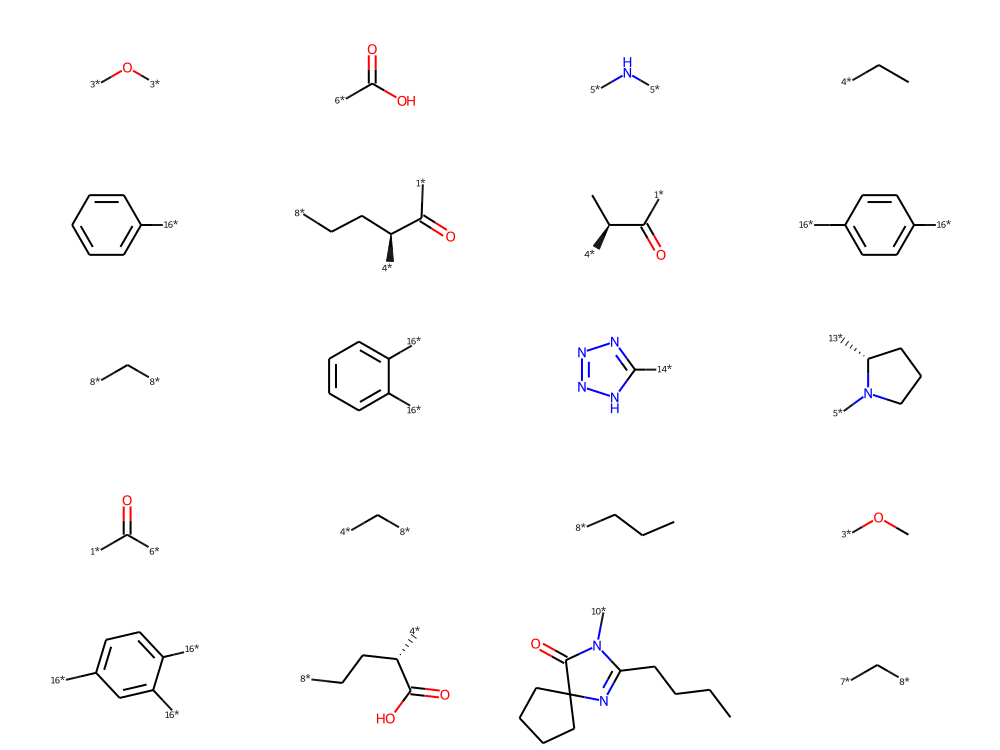

In [37]:
# view top 20 fragments that are most frequent.
mol_frags = [Chem.MolFromSmiles(i) for i in df_rule3['Fragment']][0:20]

frag_img = Draw.MolsToGridImage(mol_frags ,molsPerRow=4, subImgSize=(250,150), returnPNG=False)

# Save the images as a png file.
frag_img.save("1.1 Top 20 frequent fragments.png")
frag_img

# --- END HERE --- 
